### Optimization of circle (M,r) and ellipse (M,a,b)<br>
Uses Python Scipy Optimization module and Least Square procedures


In [81]:
%pylab inline
import scipy.optimize as opt

Populating the interactive namespace from numpy and matplotlib


### Circle

In [82]:
def circle(params):
    Mx, My, r = params
    alpha = np.linspace(0, 2*np.pi, 100)
    xs = Mx + r*np.cos(alpha)
    ys = My + r*np.sin(alpha)
    return [xs, ys]

In [83]:
def residu(vec):
    Mx, My, r = vec
    return (Mx-xs)**2 + (My-ys)**2 - r**2

[2.01739866 7.78769149 4.12717488]


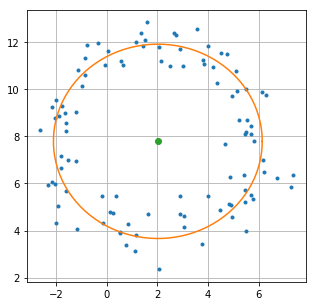

In [84]:
plt.figure(figsize=(5,5))

Mx, My = 2, 8
r = 4
np.random.seed(2020)
alpha = np.random.uniform(0, 2*np.pi, size=100)
sd = 0.7
xs = Mx + r*np.cos(alpha)
xs += np.random.normal(0, sd, size=len(alpha))
ys = My + r*np.sin(alpha)
ys += np.random.normal(0, sd, size=len(alpha))
plt.plot(xs, ys, '.');

params, _ = opt.leastsq(residu, [0, 0, 1])
print (params)
xfit, yfit = circle (params)
plt.plot(xfit, yfit)
plt.plot(params[0], params[1], 'o')

plt.grid();

In [85]:
params, _ = opt.leastsq(residu, [0, 0, 1])
print (params)

[2.01739866 7.78769149 4.12717488]


In [86]:
optimum = opt.least_squares(residu, [0, 0, 1])
print (2*optimum.cost)
print (optimum.x)

2634.834906922717
[2.01739866 7.78769149 4.12717488]


In [87]:
opt.fmin(lambda param: np.sum(residu(param)**2), [0,0,1])

Optimization terminated successfully.
         Current function value: 2634.834909
         Iterations: 278
         Function evaluations: 508


array([2.01740309, 7.78766839, 4.12717562])

In [88]:
opt.minimize(lambda param: np.sum(residu(param)**2), [0,0,1])

      fun: 2634.834906922718
 hess_inv: array([[ 1.45127208e-04,  1.76777052e-06, -4.36874513e-06],
       [ 1.76777052e-06,  1.46244300e-04, -5.86148721e-06],
       [-4.36874513e-06, -5.86148721e-06,  7.23656365e-05]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 24
     njev: 33
   status: 0
  success: True
        x: array([2.01739865, 7.78769148, 4.12717487])

### Ellipse

In [89]:
def ellipse(params):
    Mx, My, a, b = params
    alpha = np.linspace(0, 2*np.pi, 100)
    xs = Mx + a*np.cos(alpha)
    ys = My + b*np.sin(alpha)
    return [xs, ys]

In [98]:
def residu(params):
    Mx, My, a, b = params
    return (xs-Mx)**2/a**2 + (ys-My)**2/b**2 - 1

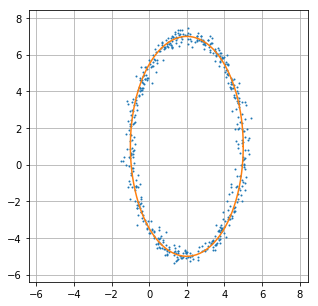

In [107]:
Mx, My = 2, 1
a, b = 3, 6
#x, y = ellipse([Mx, My, a, b])

plt.figure(figsize=(5,5))
#plt.plot(x, y)


np.random.seed(2020)
alpha = np.random.uniform(0, 2*np.pi, size=500)
sd = 0.2

xs = Mx + a*np.cos(alpha)
xs += np.random.normal(0, sd, size=len(alpha))
ys = My + b*np.sin(alpha)
ys += np.random.normal(0, sd, size=len(alpha))

plt.plot(xs, ys, 'o', ms=1);

minxy = abs(min(min(xs),min(ys)))
maxxy = abs(max(max(xs),max(ys)))
plt.xlim(-minxy-1, maxxy+1)
plt.ylim(-minxy-1, maxxy+1)

params, _ = opt.leastsq(residu, [0,0, 1,1])
xfit, yfit = ellipse([Mx, My, a, b])
plt.plot(xfit, yfit)

plt.grid();